<a href="https://colab.research.google.com/github/manish68021/projects/blob/main/TA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Python & R : TA2**                                       
Group : 9 (Healthcare)                                                     
Name of Participants: Sakshi Ahuja (2025)                                  
                      Dhruvi Vyas        (2007)                                     
                      Astha Raval (2005)                                   
                      Manish Soni (20)                                     

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read File/dataset
df = pd.read_csv("/content/healthcare_dataset.csv")
df.shape

(10000, 15)

In [ ]:
#Data Preprocessing
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
#Reading columns
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

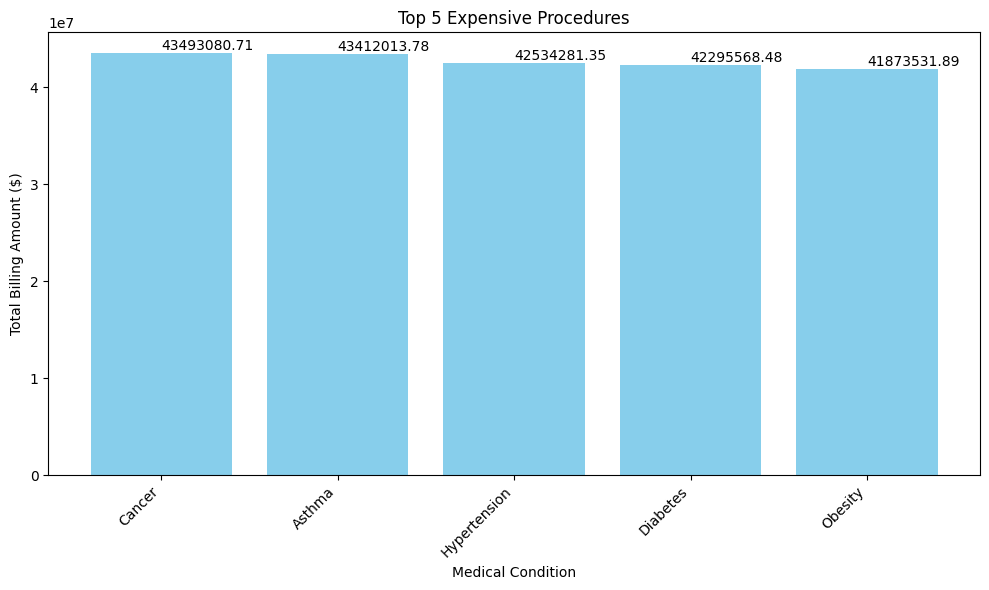

In [ ]:
#1)What are the top 5 most expensive procedures performed?

# Grouping by medical condition and summing the billing amount
condition_billing = df.groupby("Medical Condition")["Billing Amount"].sum().reset_index()

# Sorting by billing amount
condition_billing_sorted = condition_billing.sort_values(by="Billing Amount", ascending=False)

# Selecting top 5 expensive procedures
top_5_expensive_procedures = condition_billing_sorted.head(5)

# Plotting bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_expensive_procedures["Medical Condition"], top_5_expensive_procedures["Billing Amount"], color='skyblue')
plt.xlabel('Medical Condition')
plt.ylabel('Total Billing Amount ($)')
plt.title('Top 5 Expensive Procedures')
plt.xticks(rotation=45, ha='right')

# Adding the amount on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

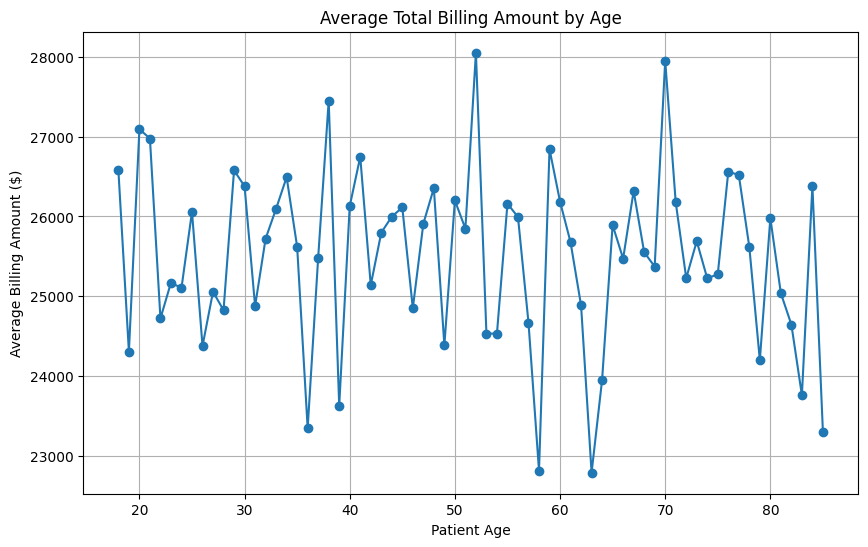

In [ ]:
#2)Is there a correlation between patient age and total billing amount?


avg_billing_by_age = df.groupby('Age')['Billing Amount'].mean().reset_index()

# Plotting line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_billing_by_age['Age'], avg_billing_by_age['Billing Amount'], marker='o', linestyle='-')
plt.title('Average Total Billing Amount by Age')
plt.xlabel('Patient Age')
plt.ylabel('Average Billing Amount ($)')
plt.grid(True)
plt.show()

# Display the donut chart
plt.show()

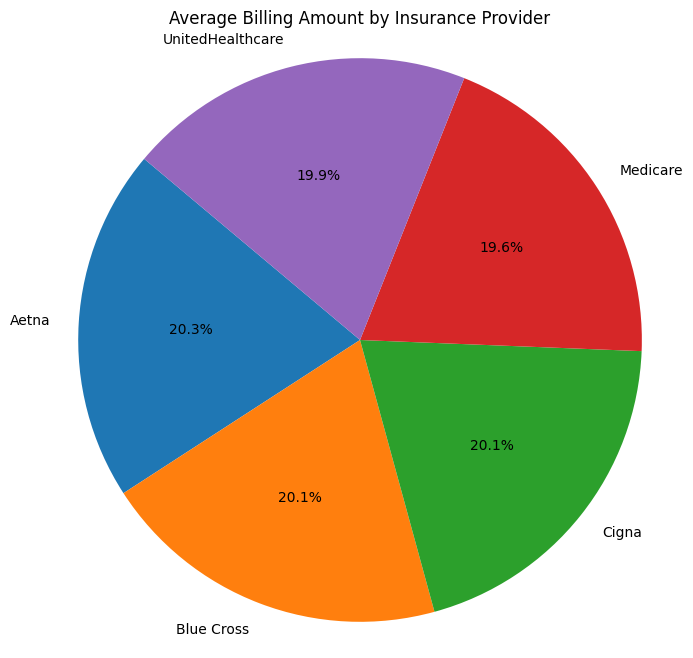

In [ ]:
#3)How does the average billing amount differ between different insurance providers?

# Calculating average billing amount for each insurance provider
avg_billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].mean()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_billing_by_insurance, labels=avg_billing_by_insurance.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Billing Amount by Insurance Provider')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

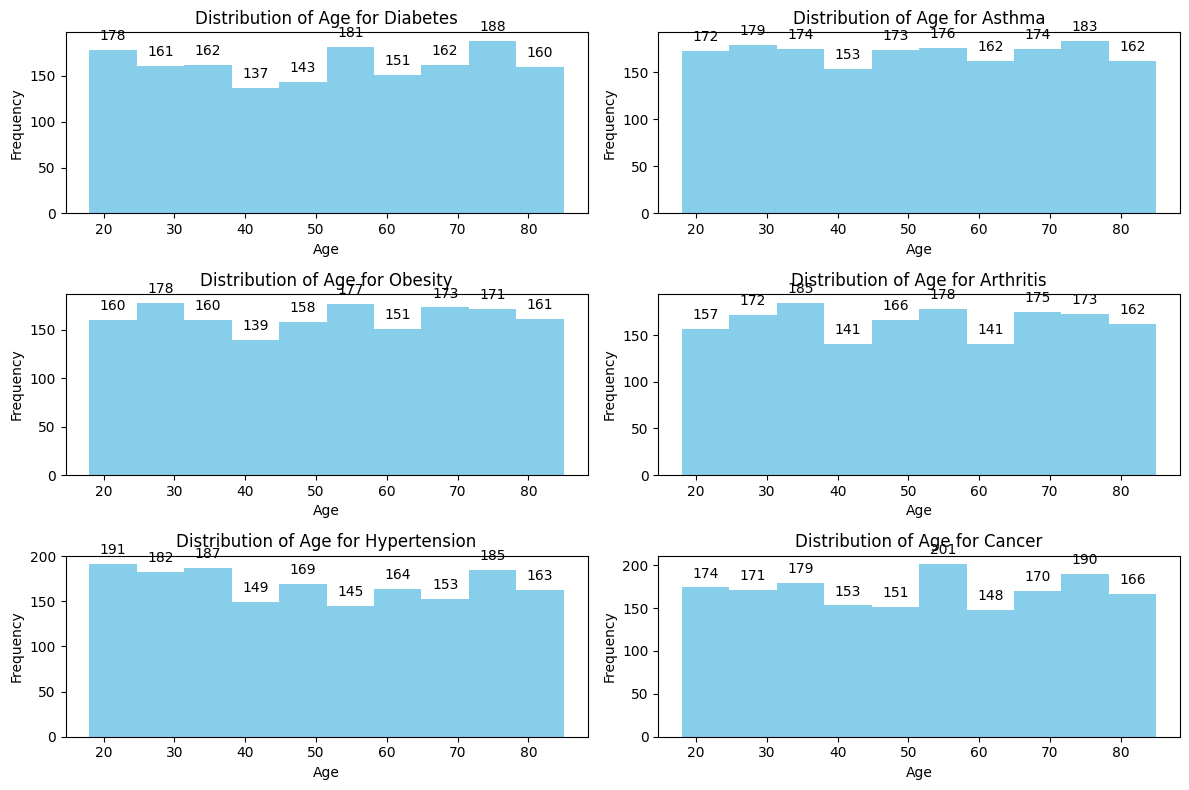

In [ ]:
# #4)Patient Demographics by Medical Condition: How do patient demographics (age, gender) vary across different medical conditions?

# Plotting histograms for each medical condition
medical_conditions = df['Medical Condition'].unique()
num_cols = 2
num_rows = (len(medical_conditions) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, medical_condition in enumerate(medical_conditions):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    condition_data = df[df['Medical Condition'] == medical_condition]
    n, bins, patches = ax.hist(condition_data['Age'], color='skyblue', bins=10)
    ax.set_title(f'Distribution of Age for {medical_condition}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')

    # Adding annotations
    for bin_val, patch in zip(bins, patches):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 187.5x600 with 0 Axes>

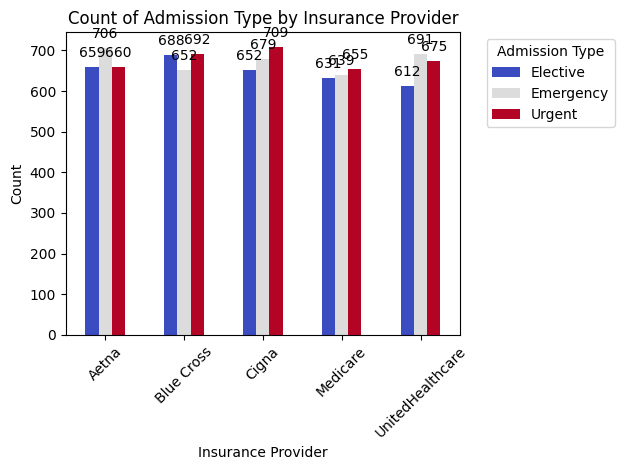

In [ ]:
# #5)Insurance Coverage and Medical Costs: How does the type of insurance coverage affect the billing amount and admission type?

# Grouping by Insurance Provider and Admission Type and counting occurrences
insurance_admission_counts = df.groupby(['Insurance Provider', 'Admission Type']).size().unstack(fill_value=0)

# Get the default width of the Colab notebook
default_width = 12  # You may need to adjust this based on your notebook's width

# Calculate the width of the graph based on the default width
colab_width = default_width / plt.rcParams['figure.figsize'][0]

# Plotting grouped bar chart
plt.figure(figsize=(colab_width, 6))  # Use the calculated width
ax = insurance_admission_counts.plot(kind='bar', stacked=False, colormap='coolwarm')
plt.title('Count of Admission Type by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Admission Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding tooltips
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{y}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


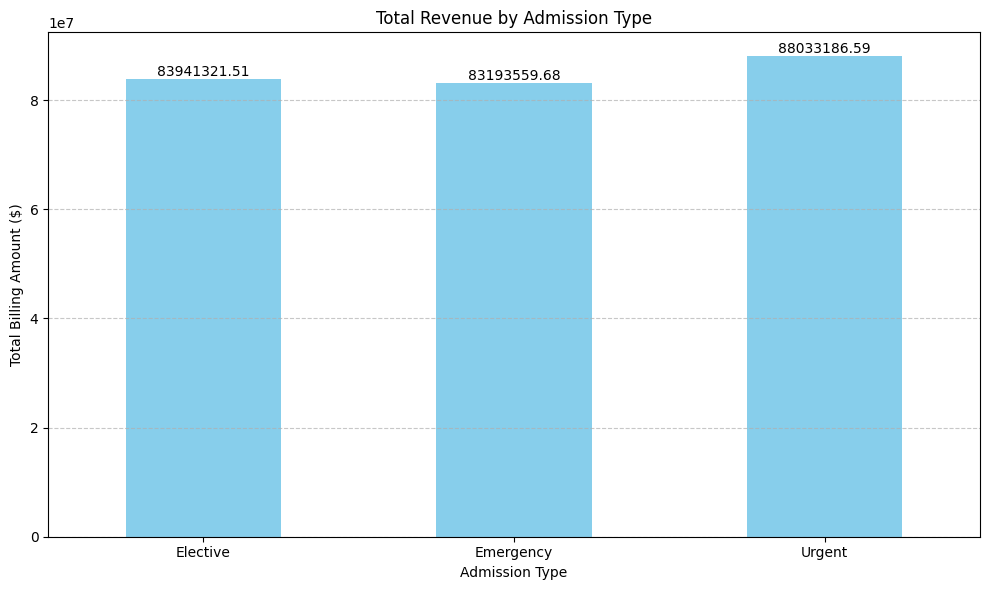

Admission type generating the most revenue: Urgent


In [ ]:

#6)Which department generates the most revenue for the hospital? (Emergency Room, Surgery, etc.)

import pandas as pd
import matplotlib.pyplot as plt


# Grouping by Admission Type and calculating total billing amount
total_billing_by_admission = df.groupby('Admission Type')['Billing Amount'].sum()

# Plotting bar chart
plt.figure(figsize=(10, 6))
bar_plot = total_billing_by_admission.plot(kind='bar', color='skyblue')

# Adding values on top of each bar
for i, v in enumerate(total_billing_by_admission):
    plt.text(i, v + 50, str(round(v, 2)), ha='center', va='bottom')

plt.title('Total Revenue by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Total Billing Amount ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Finding admission type with maximum revenue
max_revenue_admission_type = total_billing_by_admission.idxmax()
print("Admission type generating the most revenue:", max_revenue_admission_type)

In [ ]:
#7)How many patients are readmitted within 30 days of discharge?

# Converting Discharge Date to datetime
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%Y-%m-%d')

# Sorting DataFrame by Name and Discharge Date
df = df.sort_values(by=['Name', 'Discharge Date'])

# Calculate the difference in days between consecutive discharge dates for each patient
df['Days Since Previous Discharge'] = df.groupby('Name')['Discharge Date'].diff().dt.days

# Counting the number of patients readmitted within 30 days
readmitted_within_30_days = df[df['Days Since Previous Discharge'] < 30]
num_readmitted_within_30_days = len(readmitted_within_30_days)

# List of patients readmitted within 30 days
patients_readmitted_within_30_days = readmitted_within_30_days['Name'].tolist()

print("Number of patients readmitted within 30 days:", num_readmitted_within_30_days)
print("Patients readmitted within 30 days:", patients_readmitted_within_30_days)


Number of patients readmitted within 30 days: 29
Patients readmitted within 30 days: ['Benjamin Smith', 'Christina Williams', 'Christopher Baker', 'David Smith', 'Donna Davis', 'Elizabeth Johnson', 'Elizabeth Jones', 'Gregory Martin', 'John Martinez', 'John White', 'Joseph Smith', 'Kevin Hernandez', 'Lauren Castaneda', 'Lauren Morales', 'Lori Brown', 'Michael Garcia', 'Michael Johnson', 'Michael Martin', 'Michael Miller', 'Michael Thomas', 'Rachel Thomas', 'Richard Jones', 'Robert King', 'Sarah Jordan', 'Scott Perez', 'Stacey Martin', 'Stephanie Murray', 'Stephen Campbell', 'William Miller']


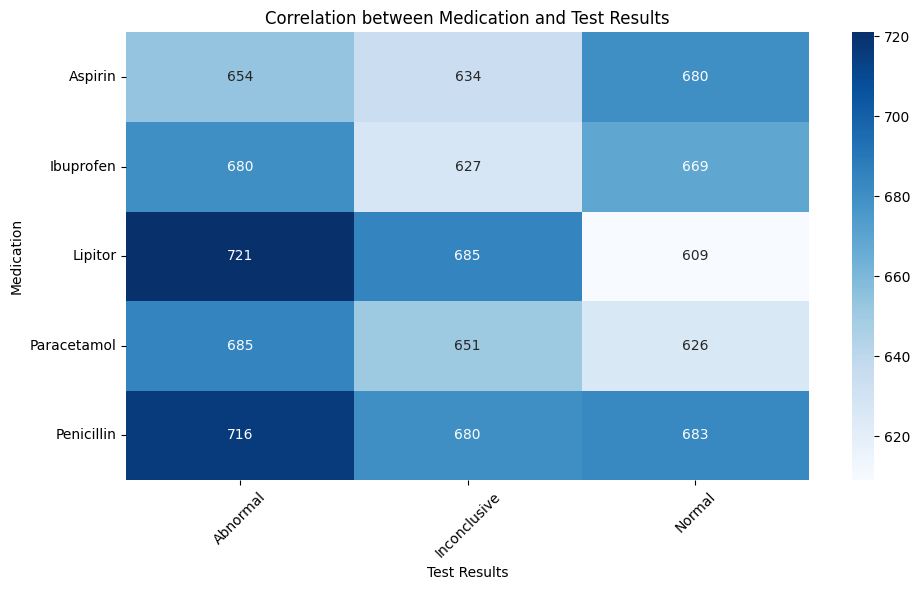

In [ ]:
#8)Effectiveness of Medication: Is there a correlation between the prescribed medication and the test results?
# Creating a contingency table
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame 'df'

# Creating a contingency table
contingency_table = pd.crosstab(df['Medication'], df['Test Results'])

# Plotting heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')  # fmt='d' formats values as integers
plt.title('Correlation between Medication and Test Results')
plt.xlabel('Test Results')
plt.ylabel('Medication')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


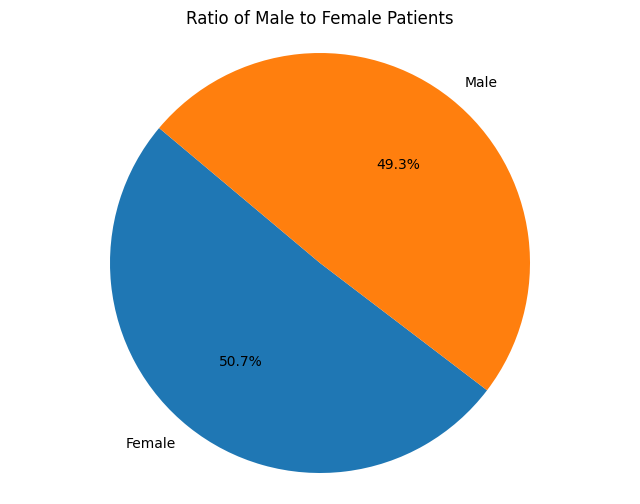

Ratio of male to female patients: 0.9704433497536946


In [ ]:
#9)What is the ratio of male to female patients?



# Counting number of male and female patients
gender_counts = df['Gender'].value_counts()

# Calculating ratio of male to female patients
male_to_female_ratio = gender_counts['Male'] / gender_counts['Female']

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Male to Female Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Displaying ratio
print("Ratio of male to female patients:", male_to_female_ratio)

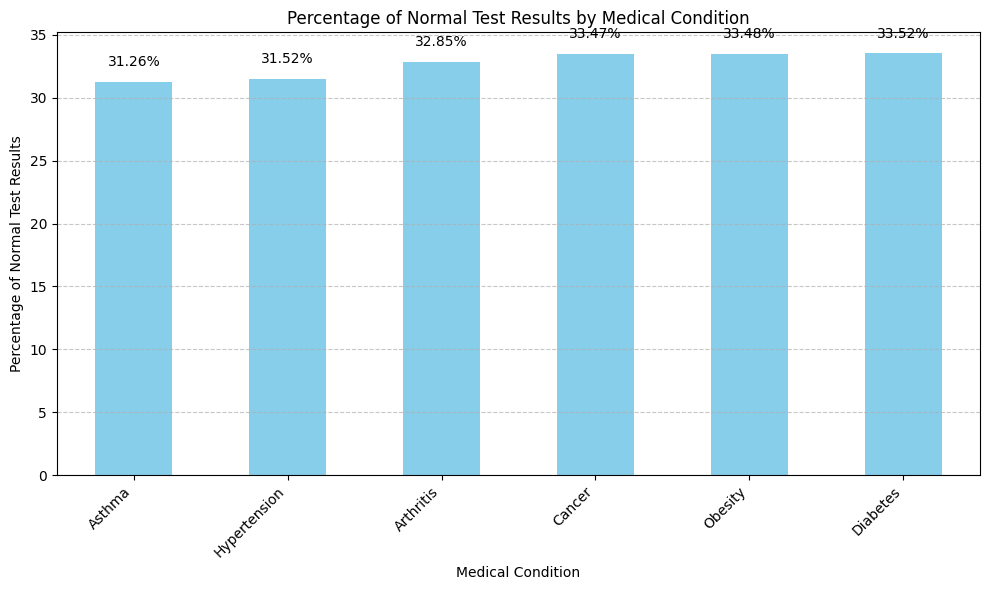

In [ ]:
#10)Treatment Effectiveness and Medical Conditions: Is there a correlation between specific medical conditions and treatment effectiveness, as measured by test results?

import pandas as pd
import matplotlib.pyplot as plt

# Calculating percentage of normal test results for each medical condition
test_results_percentage = df.groupby('Medical Condition')['Test Results'].apply(lambda x: (x == 'Normal').mean() * 100).sort_values()

# Plotting bar chart
plt.figure(figsize=(10, 6))
bar_plot = test_results_percentage.plot(kind='bar', color='skyblue')

# Adding values on top of each bar
for i, v in enumerate(test_results_percentage):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Normal Test Results by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage of Normal Test Results')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The most common blood type among patients with abnormal test results is: B-


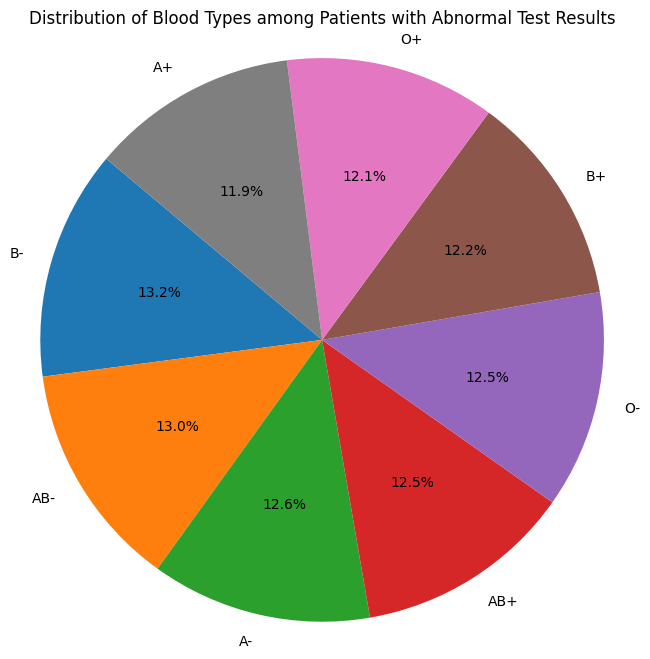

In [ ]:
#11)  Among patients with abnormal test results, what is the most common blood type?
abnormal_tests_df = df[df['Test Results'] == 'Abnormal']
blood_type_counts = abnormal_tests_df['Blood Type'].value_counts()
most_common_blood_type = blood_type_counts.idxmax()
print("The most common blood type among patients with abnormal test results is:", most_common_blood_type)
plt.figure(figsize=(8, 8))
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Blood Types among Patients with Abnormal Test Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

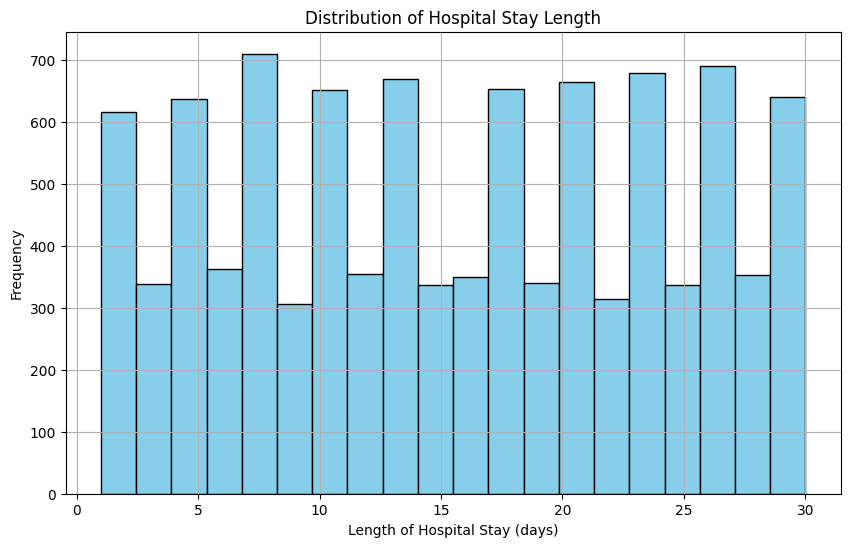

In [ ]:
# 12)  Is there any relationship between age and the length of hospital stay?


# first Calculate the length of hospital stay for each patient
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# then Plot a histogram of the lengths of hospital stay, with age as the x-axis
plt.figure(figsize=(10, 6))
plt.hist(df['Length of Stay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Hospital Stay Length')
plt.xlabel('Length of Hospital Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# 13) : Among patients with cancer, what percentage have been admitted as emergencies?



cancer_patients_df = df[df['Medical Condition'] == 'Cancer']
total_cancer_patients = len(cancer_patients_df)
emergency_cancer_patients_df = cancer_patients_df[cancer_patients_df['Admission Type'] == 'Emergency']
emergency_cancer_count = len(emergency_cancer_patients_df)
percentage_emergency_cancer = (emergency_cancer_count / total_cancer_patients) * 100
print("Percentage of patients with cancer admitted as emergencies:", percentage_emergency_cancer)

Percentage of patients with cancer admitted as emergencies: 33.94010569583089


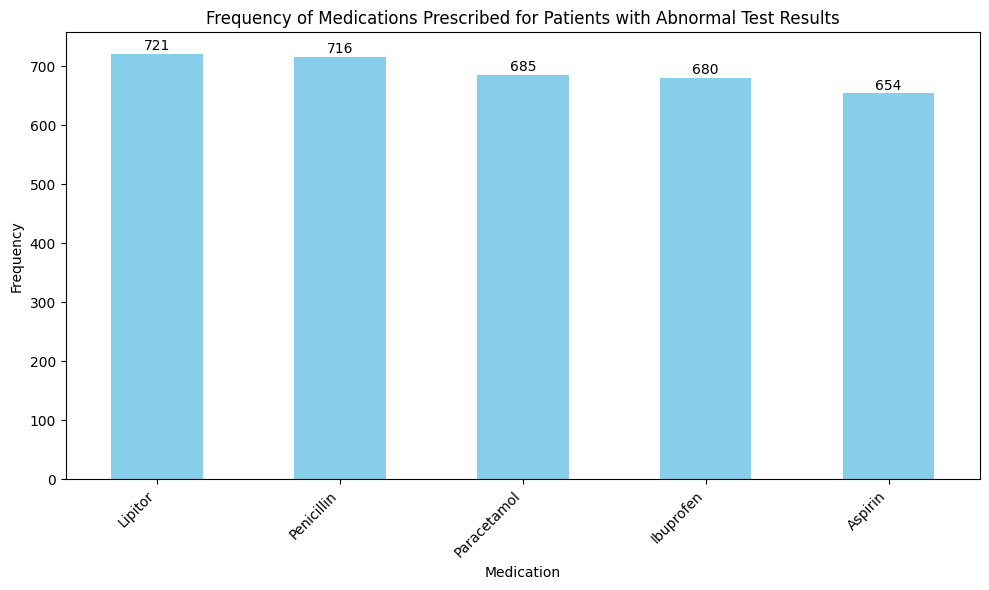

In [ ]:
# 14)  Among patients with abnormal test results, which medication is most frequently prescribed?


# first Filter rows with abnormal test results
abnormal_tests_df = df[df['Test Results'] == 'Abnormal']

medication_counts = abnormal_tests_df['Medication'].value_counts()

plt.figure(figsize=(10, 6))
medication_counts.plot(kind='bar', color='skyblue')

# Add value labels to each data point
for i, value in enumerate(medication_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.title('Frequency of Medications Prescribed for Patients with Abnormal Test Results')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

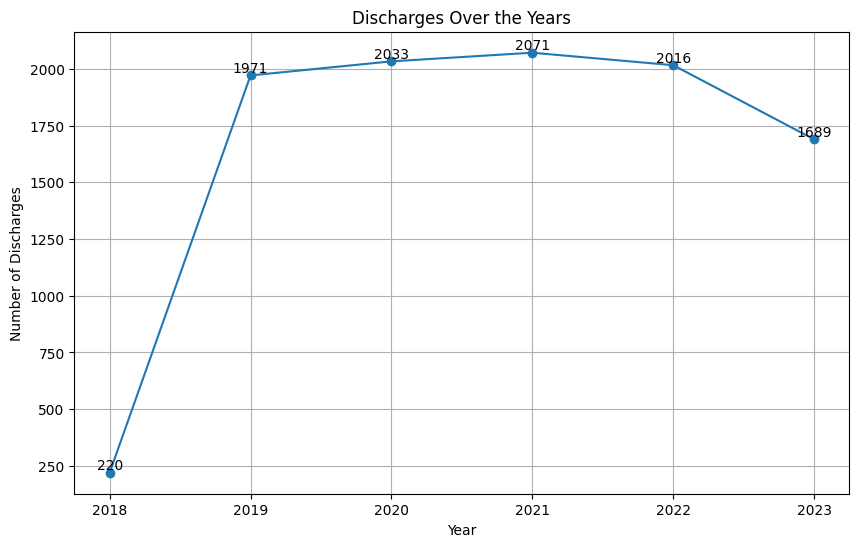

In [ ]:
# 15)  Is there any noticeable trend in the discharge dates over the years?

# first Convert 'Discharge Date' column to datetime format
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Discharge_Year'] = df['Discharge Date'].dt.year

discharges_per_year = df['Discharge_Year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(discharges_per_year.index, discharges_per_year.values, marker='o', linestyle='-')

#  Add value labels to each data point
for x, y in zip(discharges_per_year.index, discharges_per_year.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.title('Discharges Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Discharges')
plt.grid(True)
plt.show()

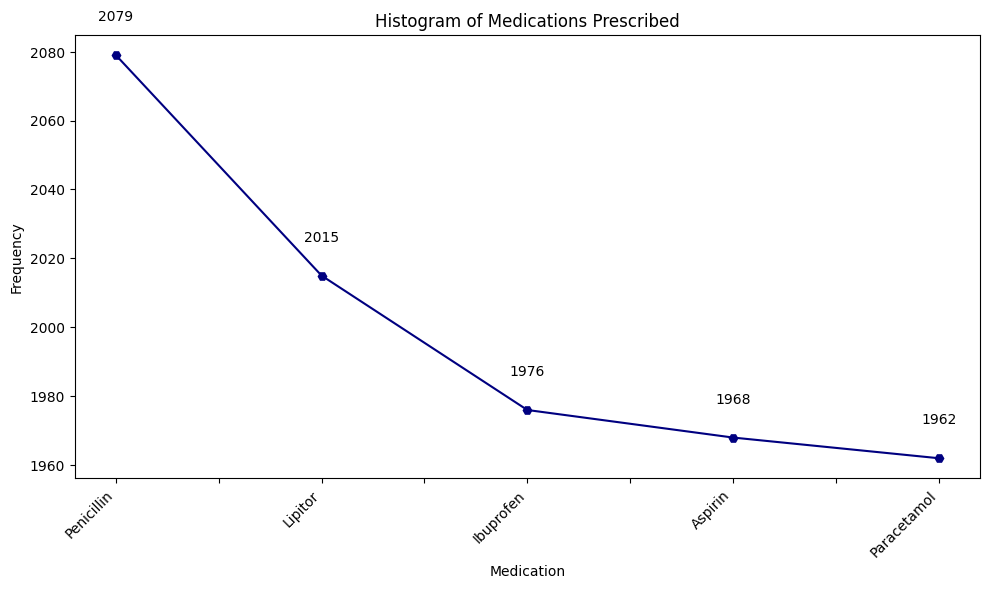

In [ ]:
# 16)	Which medications are most frequently prescribed?

medication_counts = df['Medication'].value_counts()
plt.figure(figsize=(10, 6))
medication_counts.plot(kind='line', color='navy' , marker="H")
plt.title('Histogram of Medications Prescribed')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Adding value labels to each data point
for i, value in enumerate(medication_counts.values):
    plt.annotate(value, xy=(i, value), xytext=(i, value + 10), ha='center', color='black')

plt.tight_layout()
plt.show()

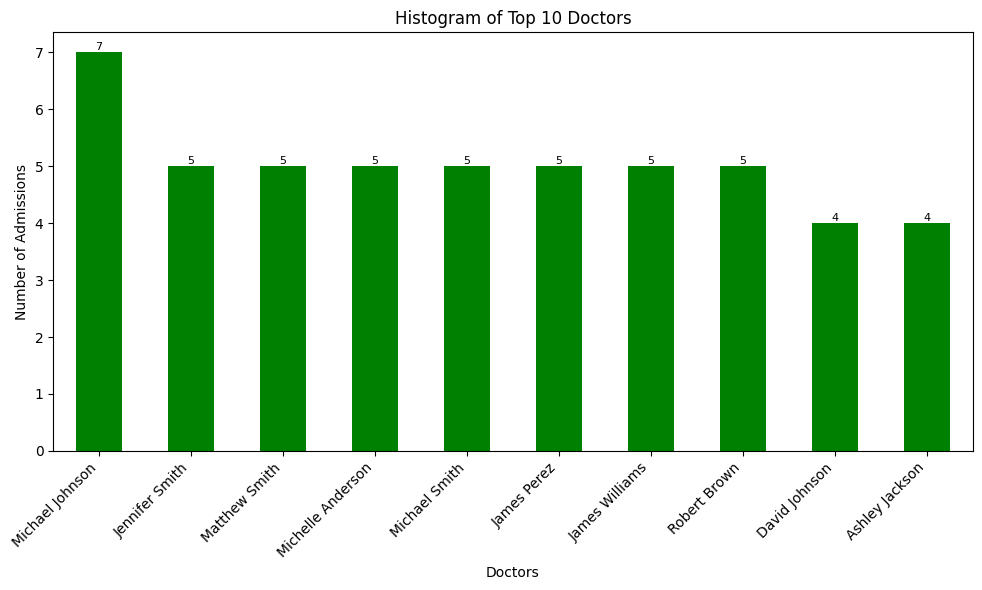

In [ ]:
# 17) Which doctors have the highest number of admissions?


Doctor_counts = df['Doctor'].value_counts()
top_doctors = Doctor_counts.head(10)

plt.figure(figsize=(10, 6))
top_doctors.plot(kind='bar', color='green')

plt.title('Histogram of Top 10 Doctors')
plt.xlabel('Doctors')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45, ha='right')

# Adding value labels to each bar
for i, value in enumerate(top_doctors.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

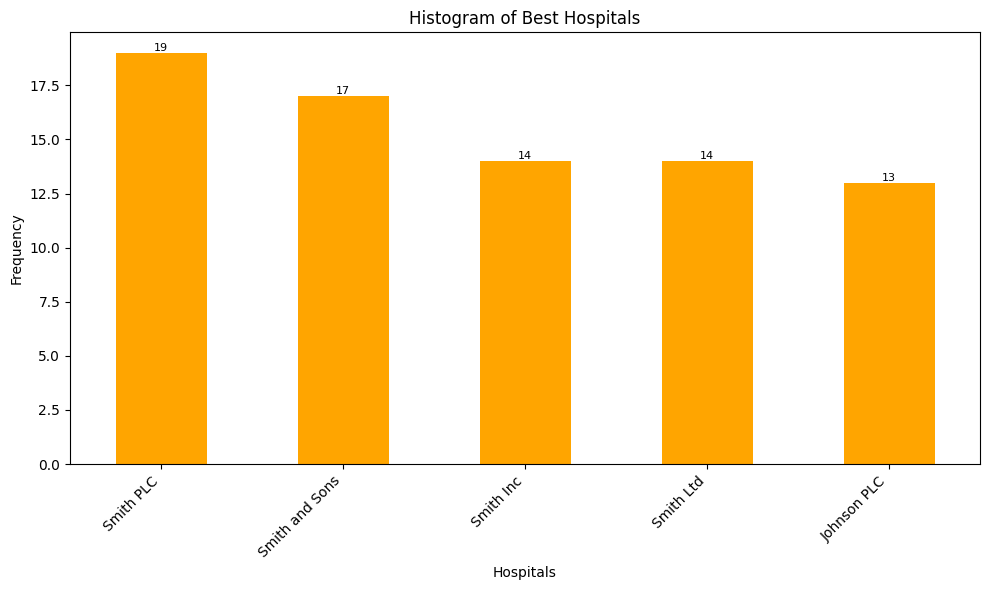

In [ ]:
# 18) Which hospital has the highest number of admissions?
hospitals_counts = df['Hospital'].value_counts()
top_hospitals = hospitals_counts.head(5)

plt.figure(figsize=(10, 6))
top_hospitals.plot(kind='bar', color='orange')

plt.title('Histogram of Best Hospitals')
plt.xlabel('Hospitals')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Adding value labels to each bar
for i, value in enumerate(top_hospitals.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

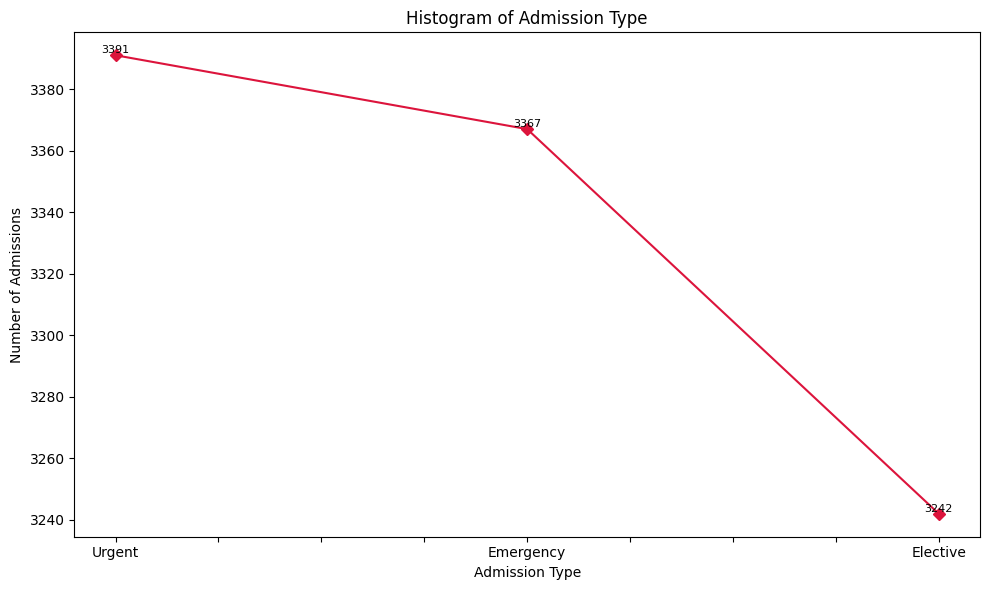

In [ ]:
# 19) How many patients were admitted as emergency vs elective vs urgent
Admission_Type = df["Admission Type"].value_counts()

plt.figure(figsize=(10, 6))
Admission_Type.plot(kind='line', marker="D", color="crimson")

plt.title('Histogram of Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0, ha='center')

# Adding value labels to each data point
for i, value in enumerate(Admission_Type.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

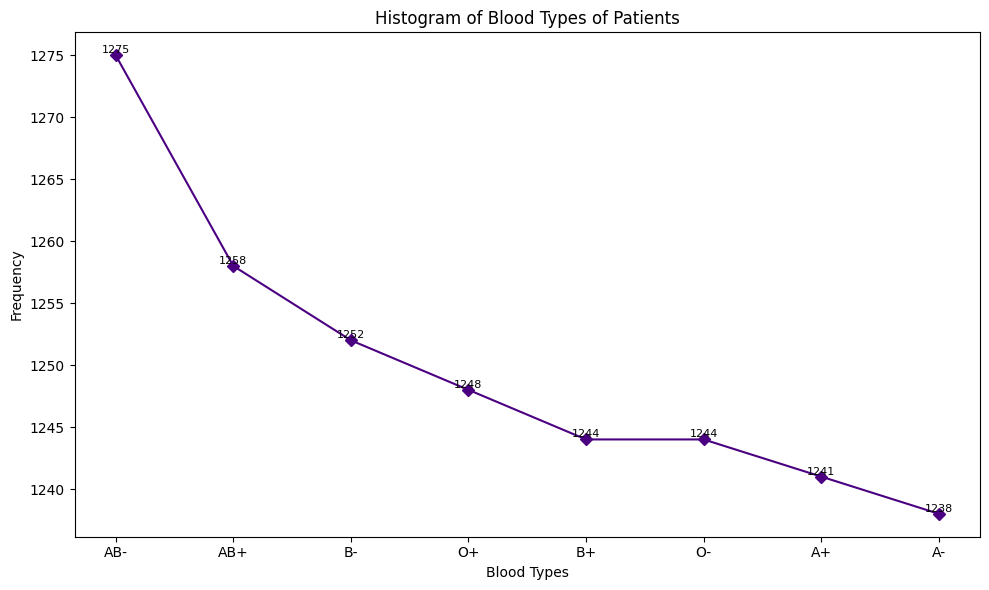

In [ ]:
# 20) What are the frequencies of different blood types among the patients?
Blood_Type = df["Blood Type"].value_counts()

plt.figure(figsize=(10, 6))
Blood_Type.plot(kind='line', marker="D", color="indigo")

plt.title('Histogram of Blood Types of Patients')
plt.xlabel('Blood Types')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='center')

# Adding value labels to each data point
for i, value in enumerate(Blood_Type.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()